In [210]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Set month

In [ ]:
year = 2022
month = 1  # MONTH 8 is missed.

# landscan_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\Landscan_daytime_2021_CBG.csv"
# landscan_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\Landscan_nighttime_2021_CBG.csv"

# hourly_popu_fname = fr"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"
ACS_file = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\cbg_acs_2019_county_tract_new20230929_cleaned.csv"

# desktop 2018
landscan_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\Landscan_daytime_2021_CBG.csv"
# hourly_popu_fname = fr"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"
hourly_popu_fname = fr"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_{year}{month:02}.csv"
# hourly_popu_fname = fr"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"

ACS_df = pd.read_csv(ACS_file, dtype={'fips':str}).iloc[:, :2].rename(columns={"fips": "CBG"}).set_index("CBG")
ACS_df



,totalpopulation
CBG,
010010201001,730
010010201002,1263
010010202001,835
010010202002,1124
010010203001,2774
...,...
721537506011,883
721537506012,2523
721537506013,991


In [212]:
print("Total ACS population:", ACS_df.sum())

Total ACS population: totalpopulation    328016242
dtype: int64


In [213]:
landscan_df = pd.read_csv(landscan_fname, dtype={'GEOID':str, 'SUM':int, 'COUNT':int})
print("Total landscan_df:", landscan_df['SUM'].sum())
landscan_df

Total landscan_df: 329734053


,OID_,GEOID,COUNT,SUM
0,2708,010010201001,593,392
1,440,010010201002,764,436
2,455,010010202001,282,1622
3,456,010010202002,173,2566
4,519,010010203001,544,974
...,...,...,...,...
216322,216170,560459511001,322468,951
216323,216171,560459511002,661427,956
216324,216173,560459513001,6566,803
216325,216174,560459513002,1676,1489


In [214]:
try:
    hourly_popu_df = pd.read_csv(hourly_popu_fname, dtype={'CBG':str} , encoding='utf-16')
except:
    hourly_popu_df = pd.read_csv(hourly_popu_fname, dtype={'CBG':str} , encoding='utf-8')
    
hourly_popu_df['CBG'] = hourly_popu_df['CBG'].str.zfill(12)
hourly_popu_df = hourly_popu_df.set_index('CBG')
hourly_popu_df

,2022-02-01 00:00:00,2022-02-01 01:00:00,2022-02-01 02:00:00,2022-02-01 03:00:00,2022-02-01 04:00:00,2022-02-01 05:00:00,2022-02-01 06:00:00,2022-02-01 07:00:00,2022-02-01 08:00:00,2022-02-01 09:00:00,2022-02-01 10:00:00,2022-02-01 11:00:00,2022-02-01 12:00:00,2022-02-01 13:00:00,2022-02-01 14:00:00,2022-02-01 15:00:00,2022-02-01 16:00:00,2022-02-01 17:00:00,2022-02-01 18:00:00,2022-02-01 19:00:00,2022-02-01 20:00:00,2022-02-01 21:00:00,2022-02-01 22:00:00,2022-02-01 23:00:00,2022-02-02 00:00:00,2022-02-02 01:00:00,2022-02-02 02:00:00,2022-02-02 03:00:00,2022-02-02 04:00:00,2022-02-02 05:00:00,2022-02-02 06:00:00,2022-02-02 07:00:00,2022-02-02 08:00:00,2022-02-02 09:00:00,2022-02-02 10:00:00,2022-02-02 11:00:00,2022-02-02 12:00:00,2022-02-02 13:00:00,2022-02-02 14:00:00,2022-02-02 15:00:00,2022-02-02 16:00:00,2022-02-02 17:00:00,2022-02-02 18:00:00,2022-02-02 19:00:00,2022-02-02 20:00:00,2022-02-02 21:00:00,2022-02-02 22:00:00,2022-02-02 23:00:00,2022-02-03 00:00:00,2022-02-03 01:00:00,2022-02-03 02:00:00,2022-02-03 03:00:00,2022-02-03 04:00:00,2022-02-03 05:00:00,2022-02-03 06:00:00,2022-02-03 07:00:00,2022-02-03 08:00:00,2022-02-03 09:00:00,2022-02-03 10:00:00,2022-02-03 11:00:00,2022-02-03 12:00:00,2022-02-03 13:00:00,2022-02-03 14:00:00,2022-02-03 15:00:00,2022-02-03 16:00:00,2022-02-03 17:00:00,2022-02-03 18:00:00,2022-02-03 19:00:00,2022-02-03 20:00:00,2022-02-03 21:00:00,2022-02-03 22:00:00,2022-02-03 23:00:00,2022-02-04 00:00:00,2022-02-04 01:00:00,2022-02-04 02:00:00,2022-02-04 03:00:00,2022-02-04 04:00:00,2022-02-04 05:00:00,2022-02-04 06:00:00,2022-02-04 07:00:00,2022-02-04 08:00:00,2022-02-04 09:00:00,2022-02-04 10:00:00,2022-02-04 11:00:00,2022-02-04 12:00:00,2022-02-04 13:00:00,2022-02-04 14:00:00,2022-02-04 15:00:00,2022-02-04 16:00:00,2022-02-04 17:00:00,2022-02-04 18:00:00,2022-02-04 19:00:00,2022-02-04 20:00:00,2022-02-04 21:00:00,2022-02-04 22:00:00,2022-02-04 23:00:00,2022-02-05 00:00:00,2022-02-05 01:00:00,2022-02-05 02:00:00,2022-02-05 03:00:00,2022-02-05 04:00:00,2022-02-05 05:00:00,2022-02-05 06:00:00,2022-02-05 07:00:00,2022-02-05 08:00:00,2022-02-05 09:00:00,2022-02-05 10:00:00,2022-02-05 11:00:00,2022-02-05 12:00:00,2022-02-05 13:00:00,2022-02-05 14:00:00,2022-02-05 15:00:00,2022-02-05 16:00:00,2022-02-05 17:00:00,2022-02-05 18:00:00,2022-02-05 19:00:00,2022-02-05 20:00:00,2022-02-05 21:00:00,2022-02-05 22:00:00,2022-02-05 23:00:00,2022-02-06 00:00:00,2022-02-06 01:00:00,2022-02-06 02:00:00,2022-02-06 03:00:00,2022-02-06 04:00:00,2022-02-06 05:00:00,2022-02-06 06:00:00,2022-02-06 07:00:00,2022-02-06 08:00:00,2022-02-06 09:00:00,2022-02-06 10:00:00,2022-02-06 11:00:00,2022-02-06 12:00:00,2022-02-06 13:00:00,2022-02-06 14:00:00,2022-02-06 15:00:00,2022-02-06 16:00:00,2022-02-06 17:00:00,2022-02-06 18:00:00,2022-02-06 19:00:00,2022-02-06 20:00:00,2022-02-06 21:00:00,2022-02-06 22:00:00,2022-02-06 23:00:00,2022-02-07 00:00:00,2022-02-07 01:00:00,2022-02-07 02:00:00,2022-02-07 03:00:00,2022-02-07 04:00:00,2022-02-07 05:00:00,2022-02-07 06:00:00,2022-02-07 07:00:00,2022-02-07 08:00:00,2022-02-07 09:00:00,2022-02-07 10:00:00,2022-02-07 11:00:00,2022-02-07 12:00:00,2022-02-07 13:00:00,2022-02-07 14:00:00,2022-02-07 15:00:00,2022-02-07 16:00:00,2022-02-07 17:00:00,2022-02-07 18:00:00,2022-02-07 19:00:00,2022-02-07 20:00:00,2022-02-07 21:00:00,2022-02-07 22:00:00,2022-02-07 23:00:00,2022-02-08 00:00:00,2022-02-08 01:00:00,2022-02-08 02:00:00,2022-02-08 03:00:00,2022-02-08 04:00:00,2022-02-08 05:00:00,2022-02-08 06:00:00,2022-02-08 07:00:00,2022-02-08 08:00:00,2022-02-08 09:00:00,2022-02-08 10:00:00,2022-02-08 11:00:00,2022-02-08 12:00:00,2022-02-08 13:00:00,2022-02-08 14:00:00,2022-02-08 15:00:00,2022-02-08 16:00:00,2022-02-08 17:00:00,2022-02-08 18:00:00,2022-02-08 19:00:00,2022-02-08 20:00:00,2022-02-08 21:00:00,2022-02-08 22:00:00,2022-02-08 23:00:00,2022-02-09 00:00:00,2022-02-09 01:00:00,2022-02-09 02:00:00,2022-02-09 03:00:00,2022-02-09 04:00:00,2022-02-09 05:00:00,2022-02-09 06:00:00,2022-02-09 07:00:00

In [215]:
# find the daytime peak
hour_cnt = hourly_popu_df.shape[1]
day_cnt = int(hour_cnt / 24)
day_hours = list(range(7, 19, 1))

for d in range(day_cnt - 1):
    day_hours += [h + 24 for h in day_hours[-12:]]

hourly_popu_df.iloc[:, day_hours]

,2022-02-01 07:00:00,2022-02-01 08:00:00,2022-02-01 09:00:00,2022-02-01 10:00:00,2022-02-01 11:00:00,2022-02-01 12:00:00,2022-02-01 13:00:00,2022-02-01 14:00:00,2022-02-01 15:00:00,2022-02-01 16:00:00,2022-02-01 17:00:00,2022-02-01 18:00:00,2022-02-02 07:00:00,2022-02-02 08:00:00,2022-02-02 09:00:00,2022-02-02 10:00:00,2022-02-02 11:00:00,2022-02-02 12:00:00,2022-02-02 13:00:00,2022-02-02 14:00:00,2022-02-02 15:00:00,2022-02-02 16:00:00,2022-02-02 17:00:00,2022-02-02 18:00:00,2022-02-03 07:00:00,2022-02-03 08:00:00,2022-02-03 09:00:00,2022-02-03 10:00:00,2022-02-03 11:00:00,2022-02-03 12:00:00,2022-02-03 13:00:00,2022-02-03 14:00:00,2022-02-03 15:00:00,2022-02-03 16:00:00,2022-02-03 17:00:00,2022-02-03 18:00:00,2022-02-04 07:00:00,2022-02-04 08:00:00,2022-02-04 09:00:00,2022-02-04 10:00:00,2022-02-04 11:00:00,2022-02-04 12:00:00,2022-02-04 13:00:00,2022-02-04 14:00:00,2022-02-04 15:00:00,2022-02-04 16:00:00,2022-02-04 17:00:00,2022-02-04 18:00:00,2022-02-05 07:00:00,2022-02-05 08:00:00,2022-02-05 09:00:00,2022-02-05 10:00:00,2022-02-05 11:00:00,2022-02-05 12:00:00,2022-02-05 13:00:00,2022-02-05 14:00:00,2022-02-05 15:00:00,2022-02-05 16:00:00,2022-02-05 17:00:00,2022-02-05 18:00:00,2022-02-06 07:00:00,2022-02-06 08:00:00,2022-02-06 09:00:00,2022-02-06 10:00:00,2022-02-06 11:00:00,2022-02-06 12:00:00,2022-02-06 13:00:00,2022-02-06 14:00:00,2022-02-06 15:00:00,2022-02-06 16:00:00,2022-02-06 17:00:00,2022-02-06 18:00:00,2022-02-07 07:00:00,2022-02-07 08:00:00,2022-02-07 09:00:00,2022-02-07 10:00:00,2022-02-07 11:00:00,2022-02-07 12:00:00,2022-02-07 13:00:00,2022-02-07 14:00:00,2022-02-07 15:00:00,2022-02-07 16:00:00,2022-02-07 17:00:00,2022-02-07 18:00:00,2022-02-08 07:00:00,2022-02-08 08:00:00,2022-02-08 09:00:00,2022-02-08 10:00:00,2022-02-08 11:00:00,2022-02-08 12:00:00,2022-02-08 13:00:00,2022-02-08 14:00:00,2022-02-08 15:00:00,2022-02-08 16:00:00,2022-02-08 17:00:00,2022-02-08 18:00:00,2022-02-09 07:00:00,2022-02-09 08:00:00,2022-02-09 09:00:00,2022-02-09 10:00:00,2022-02-09 11:00:00,2022-02-09 12:00:00,2022-02-09 13:00:00,2022-02-09 14:00:00,2022-02-09 15:00:00,2022-02-09 16:00:00,2022-02-09 17:00:00,2022-02-09 18:00:00,2022-02-10 07:00:00,2022-02-10 08:00:00,2022-02-10 09:00:00,2022-02-10 10:00:00,2022-02-10 11:00:00,2022-02-10 12:00:00,2022-02-10 13:00:00,2022-02-10 14:00:00,2022-02-10 15:00:00,2022-02-10 16:00:00,2022-02-10 17:00:00,2022-02-10 18:00:00,2022-02-11 07:00:00,2022-02-11 08:00:00,2022-02-11 09:00:00,2022-02-11 10:00:00,2022-02-11 11:00:00,2022-02-11 12:00:00,2022-02-11 13:00:00,2022-02-11 14:00:00,2022-02-11 15:00:00,2022-02-11 16:00:00,2022-02-11 17:00:00,2022-02-11 18:00:00,2022-02-12 07:00:00,2022-02-12 08:00:00,2022-02-12 09:00:00,2022-02-12 10:00:00,2022-02-12 11:00:00,2022-02-12 12:00:00,2022-02-12 13:00:00,2022-02-12 14:00:00,2022-02-12 15:00:00,2022-02-12 16:00:00,2022-02-12 17:00:00,2022-02-12 18:00:00,2022-02-13 07:00:00,2022-02-13 08:00:00,2022-02-13 09:00:00,2022-02-13 10:00:00,2022-02-13 11:00:00,2022-02-13 12:00:00,2022-02-13 13:00:00,2022-02-13 14:00:00,2022-02-13 15:00:00,2022-02-13 16:00:00,2022-02-13 17:00:00,2022-02-13 18:00:00,2022-02-14 07:00:00,2022-02-14 08:00:00,2022-02-14 09:00:00,2022-02-14 10:00:00,2022-02-14 11:00:00,2022-02-14 12:00:00,2022-02-14 13:00:00,2022-02-14 14:00:00,2022-02-14 15:00:00,2022-02-14 16:00:00,2022-02-14 17:00:00,2022-02-14 18:00:00,2022-02-15 07:00:00,2022-02-15 08:00:00,2022-02-15 09:00:00,2022-02-15 10:00:00,2022-02-15 11:00:00,2022-02-15 12:00:00,2022-02-15 13:00:00,2022-02-15 14:00:00,2022-02-15 15:00:00,2022-02-15 16:00:00,2022-02-15 17:00:00,2022-02-15 18:00:00,2022-02-16 07:00:00,2022-02-16 08:00:00,2022-02-16 09:00:00,2022-02-16 10:00:00,2022-02-16 11:00:00,2022-02-16 12:00:00,2022-02-16 13:00:00,2022-02-16 14:00:00,2022-02-16 15:00:00,2022-02-16 16:00:00,2022-02-16 17:00:00,2022-02-16 18:00:00,2022-02-17 07:00:00,2022-02-17 08:00:00,2022-02-17 09:00:00,2022-02-17 10:00:00,2022-02-17 11:00:00,2022-02-17 12:00:00,2022-02-17 13:00:00,2022-02-17 14:00:00

In [216]:
from datetime import datetime

import calendar
from datetime import datetime, timedelta

def list_all_dates(year, month):
    # Number of days in the given month
    num_days = calendar.monthrange(year, month)[1]

    # Start date of the month
    start_date = datetime(year, month, 1)

    # List to hold all dates
    all_dates = []

    # Loop through all days of the month and add to the list
    for day in range(num_days):
        current_date = start_date + timedelta(days=day)
        all_dates.append(current_date.strftime("%Y-%m-%d"))

    return all_dates

# Example usage
# year = 2023
# month = 6


def is_weekday(date_str):
    # Parse the date string to a datetime object
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    
    # Get the day of the week (0 is Monday, 6 is Sunday)
    day_of_week = date_obj.weekday()
    
    # Check if it's a weekday
    return 0 <= day_of_week <= 4

# Example usage
# date_input = "2023-11-13"  # Use the format YYYY-MM-DD
# print(is_weekday(date_input))  # This will print True or False

# dates

In [217]:
hourly_popu_df

,2022-02-01 00:00:00,2022-02-01 01:00:00,2022-02-01 02:00:00,2022-02-01 03:00:00,2022-02-01 04:00:00,2022-02-01 05:00:00,2022-02-01 06:00:00,2022-02-01 07:00:00,2022-02-01 08:00:00,2022-02-01 09:00:00,2022-02-01 10:00:00,2022-02-01 11:00:00,2022-02-01 12:00:00,2022-02-01 13:00:00,2022-02-01 14:00:00,2022-02-01 15:00:00,2022-02-01 16:00:00,2022-02-01 17:00:00,2022-02-01 18:00:00,2022-02-01 19:00:00,2022-02-01 20:00:00,2022-02-01 21:00:00,2022-02-01 22:00:00,2022-02-01 23:00:00,2022-02-02 00:00:00,2022-02-02 01:00:00,2022-02-02 02:00:00,2022-02-02 03:00:00,2022-02-02 04:00:00,2022-02-02 05:00:00,2022-02-02 06:00:00,2022-02-02 07:00:00,2022-02-02 08:00:00,2022-02-02 09:00:00,2022-02-02 10:00:00,2022-02-02 11:00:00,2022-02-02 12:00:00,2022-02-02 13:00:00,2022-02-02 14:00:00,2022-02-02 15:00:00,2022-02-02 16:00:00,2022-02-02 17:00:00,2022-02-02 18:00:00,2022-02-02 19:00:00,2022-02-02 20:00:00,2022-02-02 21:00:00,2022-02-02 22:00:00,2022-02-02 23:00:00,2022-02-03 00:00:00,2022-02-03 01:00:00,2022-02-03 02:00:00,2022-02-03 03:00:00,2022-02-03 04:00:00,2022-02-03 05:00:00,2022-02-03 06:00:00,2022-02-03 07:00:00,2022-02-03 08:00:00,2022-02-03 09:00:00,2022-02-03 10:00:00,2022-02-03 11:00:00,2022-02-03 12:00:00,2022-02-03 13:00:00,2022-02-03 14:00:00,2022-02-03 15:00:00,2022-02-03 16:00:00,2022-02-03 17:00:00,2022-02-03 18:00:00,2022-02-03 19:00:00,2022-02-03 20:00:00,2022-02-03 21:00:00,2022-02-03 22:00:00,2022-02-03 23:00:00,2022-02-04 00:00:00,2022-02-04 01:00:00,2022-02-04 02:00:00,2022-02-04 03:00:00,2022-02-04 04:00:00,2022-02-04 05:00:00,2022-02-04 06:00:00,2022-02-04 07:00:00,2022-02-04 08:00:00,2022-02-04 09:00:00,2022-02-04 10:00:00,2022-02-04 11:00:00,2022-02-04 12:00:00,2022-02-04 13:00:00,2022-02-04 14:00:00,2022-02-04 15:00:00,2022-02-04 16:00:00,2022-02-04 17:00:00,2022-02-04 18:00:00,2022-02-04 19:00:00,2022-02-04 20:00:00,2022-02-04 21:00:00,2022-02-04 22:00:00,2022-02-04 23:00:00,2022-02-05 00:00:00,2022-02-05 01:00:00,2022-02-05 02:00:00,2022-02-05 03:00:00,2022-02-05 04:00:00,2022-02-05 05:00:00,2022-02-05 06:00:00,2022-02-05 07:00:00,2022-02-05 08:00:00,2022-02-05 09:00:00,2022-02-05 10:00:00,2022-02-05 11:00:00,2022-02-05 12:00:00,2022-02-05 13:00:00,2022-02-05 14:00:00,2022-02-05 15:00:00,2022-02-05 16:00:00,2022-02-05 17:00:00,2022-02-05 18:00:00,2022-02-05 19:00:00,2022-02-05 20:00:00,2022-02-05 21:00:00,2022-02-05 22:00:00,2022-02-05 23:00:00,2022-02-06 00:00:00,2022-02-06 01:00:00,2022-02-06 02:00:00,2022-02-06 03:00:00,2022-02-06 04:00:00,2022-02-06 05:00:00,2022-02-06 06:00:00,2022-02-06 07:00:00,2022-02-06 08:00:00,2022-02-06 09:00:00,2022-02-06 10:00:00,2022-02-06 11:00:00,2022-02-06 12:00:00,2022-02-06 13:00:00,2022-02-06 14:00:00,2022-02-06 15:00:00,2022-02-06 16:00:00,2022-02-06 17:00:00,2022-02-06 18:00:00,2022-02-06 19:00:00,2022-02-06 20:00:00,2022-02-06 21:00:00,2022-02-06 22:00:00,2022-02-06 23:00:00,2022-02-07 00:00:00,2022-02-07 01:00:00,2022-02-07 02:00:00,2022-02-07 03:00:00,2022-02-07 04:00:00,2022-02-07 05:00:00,2022-02-07 06:00:00,2022-02-07 07:00:00,2022-02-07 08:00:00,2022-02-07 09:00:00,2022-02-07 10:00:00,2022-02-07 11:00:00,2022-02-07 12:00:00,2022-02-07 13:00:00,2022-02-07 14:00:00,2022-02-07 15:00:00,2022-02-07 16:00:00,2022-02-07 17:00:00,2022-02-07 18:00:00,2022-02-07 19:00:00,2022-02-07 20:00:00,2022-02-07 21:00:00,2022-02-07 22:00:00,2022-02-07 23:00:00,2022-02-08 00:00:00,2022-02-08 01:00:00,2022-02-08 02:00:00,2022-02-08 03:00:00,2022-02-08 04:00:00,2022-02-08 05:00:00,2022-02-08 06:00:00,2022-02-08 07:00:00,2022-02-08 08:00:00,2022-02-08 09:00:00,2022-02-08 10:00:00,2022-02-08 11:00:00,2022-02-08 12:00:00,2022-02-08 13:00:00,2022-02-08 14:00:00,2022-02-08 15:00:00,2022-02-08 16:00:00,2022-02-08 17:00:00,2022-02-08 18:00:00,2022-02-08 19:00:00,2022-02-08 20:00:00,2022-02-08 21:00:00,2022-02-08 22:00:00,2022-02-08 23:00:00,2022-02-09 00:00:00,2022-02-09 01:00:00,2022-02-09 02:00:00,2022-02-09 03:00:00,2022-02-09 04:00:00,2022-02-09 05:00:00,2022-02-09 06:00:00,2022-02-09 07:00:00

In [218]:
# dates
print("Negative cell ratio:")
(hourly_popu_df<0).sum().sum() / (hourly_popu_df.shape[0] * hourly_popu_df.shape[1])#.min(axis=1)  # too many negtive values

Negative cell ratio:


np.float64(0.030270199664424)

In [219]:
dates = list_all_dates(year, month)
print(dates)
noon_popu_list = []
for idx, d in enumerate(dates):
    if is_weekday(d):
        # print(d)
        # noon_popu_list.append(hourly_popu_df.iloc[:, 13 + idx * 24])  # noon 
        noon_popu_list.append(hourly_popu_df.iloc[:, 1 + idx * 24])  # night
        
noon_popu_df = pd.DataFrame(pd.concat(noon_popu_list, axis=1).mean(axis=1))
noon_popu_df.columns = ['noon_popu']
noon_popu_df

['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28']


,noon_popu
CBG,
010010201001,652.30
010010201002,1554.20
010010202001,765.60
010010202002,1046.30
010010203001,2654.00
...,...
560459511001,1355.75
560459511002,1830.60
560459513001,1234.85


In [220]:
hourly_popu_df

,2022-02-01 00:00:00,2022-02-01 01:00:00,2022-02-01 02:00:00,2022-02-01 03:00:00,2022-02-01 04:00:00,2022-02-01 05:00:00,2022-02-01 06:00:00,2022-02-01 07:00:00,2022-02-01 08:00:00,2022-02-01 09:00:00,2022-02-01 10:00:00,2022-02-01 11:00:00,2022-02-01 12:00:00,2022-02-01 13:00:00,2022-02-01 14:00:00,2022-02-01 15:00:00,2022-02-01 16:00:00,2022-02-01 17:00:00,2022-02-01 18:00:00,2022-02-01 19:00:00,2022-02-01 20:00:00,2022-02-01 21:00:00,2022-02-01 22:00:00,2022-02-01 23:00:00,2022-02-02 00:00:00,2022-02-02 01:00:00,2022-02-02 02:00:00,2022-02-02 03:00:00,2022-02-02 04:00:00,2022-02-02 05:00:00,2022-02-02 06:00:00,2022-02-02 07:00:00,2022-02-02 08:00:00,2022-02-02 09:00:00,2022-02-02 10:00:00,2022-02-02 11:00:00,2022-02-02 12:00:00,2022-02-02 13:00:00,2022-02-02 14:00:00,2022-02-02 15:00:00,2022-02-02 16:00:00,2022-02-02 17:00:00,2022-02-02 18:00:00,2022-02-02 19:00:00,2022-02-02 20:00:00,2022-02-02 21:00:00,2022-02-02 22:00:00,2022-02-02 23:00:00,2022-02-03 00:00:00,2022-02-03 01:00:00,2022-02-03 02:00:00,2022-02-03 03:00:00,2022-02-03 04:00:00,2022-02-03 05:00:00,2022-02-03 06:00:00,2022-02-03 07:00:00,2022-02-03 08:00:00,2022-02-03 09:00:00,2022-02-03 10:00:00,2022-02-03 11:00:00,2022-02-03 12:00:00,2022-02-03 13:00:00,2022-02-03 14:00:00,2022-02-03 15:00:00,2022-02-03 16:00:00,2022-02-03 17:00:00,2022-02-03 18:00:00,2022-02-03 19:00:00,2022-02-03 20:00:00,2022-02-03 21:00:00,2022-02-03 22:00:00,2022-02-03 23:00:00,2022-02-04 00:00:00,2022-02-04 01:00:00,2022-02-04 02:00:00,2022-02-04 03:00:00,2022-02-04 04:00:00,2022-02-04 05:00:00,2022-02-04 06:00:00,2022-02-04 07:00:00,2022-02-04 08:00:00,2022-02-04 09:00:00,2022-02-04 10:00:00,2022-02-04 11:00:00,2022-02-04 12:00:00,2022-02-04 13:00:00,2022-02-04 14:00:00,2022-02-04 15:00:00,2022-02-04 16:00:00,2022-02-04 17:00:00,2022-02-04 18:00:00,2022-02-04 19:00:00,2022-02-04 20:00:00,2022-02-04 21:00:00,2022-02-04 22:00:00,2022-02-04 23:00:00,2022-02-05 00:00:00,2022-02-05 01:00:00,2022-02-05 02:00:00,2022-02-05 03:00:00,2022-02-05 04:00:00,2022-02-05 05:00:00,2022-02-05 06:00:00,2022-02-05 07:00:00,2022-02-05 08:00:00,2022-02-05 09:00:00,2022-02-05 10:00:00,2022-02-05 11:00:00,2022-02-05 12:00:00,2022-02-05 13:00:00,2022-02-05 14:00:00,2022-02-05 15:00:00,2022-02-05 16:00:00,2022-02-05 17:00:00,2022-02-05 18:00:00,2022-02-05 19:00:00,2022-02-05 20:00:00,2022-02-05 21:00:00,2022-02-05 22:00:00,2022-02-05 23:00:00,2022-02-06 00:00:00,2022-02-06 01:00:00,2022-02-06 02:00:00,2022-02-06 03:00:00,2022-02-06 04:00:00,2022-02-06 05:00:00,2022-02-06 06:00:00,2022-02-06 07:00:00,2022-02-06 08:00:00,2022-02-06 09:00:00,2022-02-06 10:00:00,2022-02-06 11:00:00,2022-02-06 12:00:00,2022-02-06 13:00:00,2022-02-06 14:00:00,2022-02-06 15:00:00,2022-02-06 16:00:00,2022-02-06 17:00:00,2022-02-06 18:00:00,2022-02-06 19:00:00,2022-02-06 20:00:00,2022-02-06 21:00:00,2022-02-06 22:00:00,2022-02-06 23:00:00,2022-02-07 00:00:00,2022-02-07 01:00:00,2022-02-07 02:00:00,2022-02-07 03:00:00,2022-02-07 04:00:00,2022-02-07 05:00:00,2022-02-07 06:00:00,2022-02-07 07:00:00,2022-02-07 08:00:00,2022-02-07 09:00:00,2022-02-07 10:00:00,2022-02-07 11:00:00,2022-02-07 12:00:00,2022-02-07 13:00:00,2022-02-07 14:00:00,2022-02-07 15:00:00,2022-02-07 16:00:00,2022-02-07 17:00:00,2022-02-07 18:00:00,2022-02-07 19:00:00,2022-02-07 20:00:00,2022-02-07 21:00:00,2022-02-07 22:00:00,2022-02-07 23:00:00,2022-02-08 00:00:00,2022-02-08 01:00:00,2022-02-08 02:00:00,2022-02-08 03:00:00,2022-02-08 04:00:00,2022-02-08 05:00:00,2022-02-08 06:00:00,2022-02-08 07:00:00,2022-02-08 08:00:00,2022-02-08 09:00:00,2022-02-08 10:00:00,2022-02-08 11:00:00,2022-02-08 12:00:00,2022-02-08 13:00:00,2022-02-08 14:00:00,2022-02-08 15:00:00,2022-02-08 16:00:00,2022-02-08 17:00:00,2022-02-08 18:00:00,2022-02-08 19:00:00,2022-02-08 20:00:00,2022-02-08 21:00:00,2022-02-08 22:00:00,2022-02-08 23:00:00,2022-02-09 00:00:00,2022-02-09 01:00:00,2022-02-09 02:00:00,2022-02-09 03:00:00,2022-02-09 04:00:00,2022-02-09 05:00:00,2022-02-09 06:00:00,2022-02-09 07:00:00

In [221]:
# day_hour_popu_df = hourly_popu_df.iloc[:, day_hours]
# day_hour_popu_df.iloc[0, :].nlargest(4).mean()

day_night_popu_df =  ad_op.landscan_compare(hourly_popu_df=hourly_popu_df, year=year, month=month) 
# day_night_popu_df[['weighted_day_ratio', 'weighted_night_ratio']].abs().sum()
# day_night_popu_df

In [222]:
day_night_popu_df = day_night_popu_df.merge(ACS_df, left_on='CBG', right_index=True)
day_night_popu_df

,index,CBG,hourly_noon_popu,hourly_midnight_popu,month_day_count,weekday_count,landscan_day,landscan_night,day_ratio,night_ratio,day_weight,weighted_day_ratio,night_weight,weighted_night_ratio,day_diff_ratio,night_diff_ratio,weighted_day_diff_ratio,weighted_night_diff_ratio,totalpopulation
0,0,010010201001,303.35,652.30,28,20,392.0,580.0,0.773852,1.124655,0.000001,9.230433e-07,0.000002,0.000002,-0.226148,0.184439,-2.697471e-07,3.247736e-07,730
1,1,010010201002,434.80,1554.20,28,20,436.0,1194.0,0.997248,1.301675,0.000001,1.323024e-06,0.000004,0.000005,-0.002752,0.826147,-3.651399e-09,2.994761e-06,1263
2,2,010010202001,552.50,765.60,28,20,1622.0,904.0,0.340629,0.846903,0.000005,1.681165e-06,0.000003,0.000002,-0.659371,-0.085327,-3.254309e-06,-2.341824e-07,835
3,3,010010202002,2323.30,1046.30,28,20,2566.0,1116.0,0.905417,0.937545,0.000008,7.069413e-06,0.000003,0.000003,-0.094583,-0.027163,-7.384955e-07,-9.203243e-08,1124
4,4,010010203001,1086.35,2654.00,28,20,974.0,2254.0,1.115349,1.177462,0.000003,3.305581e-06,0.000007,0.000008,0.115349,0.410678,3.418622e-07,2.810318e-06,2774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215094,215337,560459511001,529.60,1355.75,28,20,951.0,1408.0,0.556887,0.962891,0.000003,1.611484e-06,0.000004,0.000004,-0.443113,-0.054942,-1.282250e-06,-2.348600e-07,1450
215095,215338,560459511002,1101.70,1830.60,28,20,956.0,1798.0,1.152406,1.018131,0.000003,3.352289e-06,0.000005,0.000006,0.152406,0.034100,4.433407e-07,1.861444e-07,1844
215096,215339,560459513001,698.20,1234.85,28,20,803.0,1041.0,0.869489,1.186215,0.000002,2.124506e-06,0.000003,0.000004,-0.130511,0.241407,-3.188889e-07,7.629596e-07,1314
215097,215340,560459513002,2833.35,1127.00,28,20,1489.0,1179.0,1.902854,0.955895,0.000005,8.621410e-06,0.000004,0.000003,0.902854,-0.034923,4.090632e-06,-1.250037e-07,1164


In [223]:
day_night_popu_df[['hourly_noon_popu', 'landscan_day', 'day_ratio', 'day_weight', 'weighted_day_ratio']].sample(10)

,hourly_noon_popu,landscan_day,day_ratio,day_weight,weighted_day_ratio
190279,1465.75,899.0,1.630423,2.735507e-06,0.000004
114720,422.35,223.0,1.893946,6.785517e-07,0.000001
180152,1171.80,427.0,2.744262,1.299290e-06,0.000004
58560,3135.40,2644.0,1.185855,8.045249e-06,0.000010
29943,854.90,1937.0,0.441353,5.893967e-06,0.000003
188431,593.70,811.0,0.732059,2.467737e-06,0.000002
52265,1298.80,1102.0,1.178584,3.353202e-06,0.000004
53589,1329.65,475.0,2.799263,1.445345e-06,0.000004
85887,702.10,1229.0,0.571277,3.739641e-06,0.000002
80037,560.60,385.0,1.456104,1.171491e-06,0.000002


<Axes: xlabel='totalpopulation', ylabel='landscan_night'>

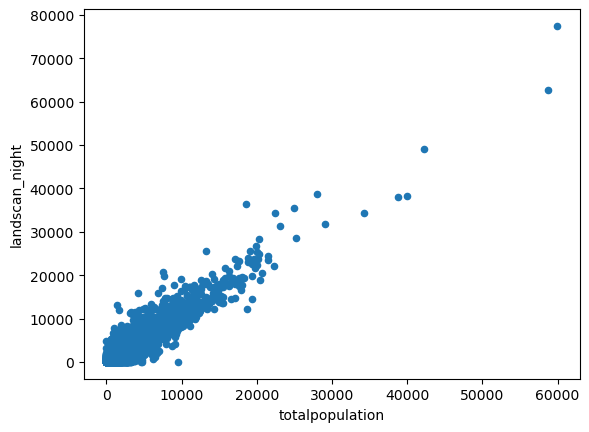

In [224]:
day_night_popu_df.plot.scatter(x='totalpopulation', y='landscan_night')

In [225]:
# day_night_popu_df['weighted_day_diff'].abs().sum()
# day_night_popu_df

In [226]:
day_night_popu_df['ACS_diff_ratio'] = (day_night_popu_df['totalpopulation'] - day_night_popu_df['landscan_night']) /  day_night_popu_df['landscan_night']
day_night_popu_df['weighted_ACS_diff_ratio'] = day_night_popu_df['ACS_diff_ratio'] * day_night_popu_df['night_weight']
day_night_popu_df

,index,CBG,hourly_noon_popu,hourly_midnight_popu,month_day_count,weekday_count,landscan_day,landscan_night,day_ratio,night_ratio,day_weight,weighted_day_ratio,night_weight,weighted_night_ratio,day_diff_ratio,night_diff_ratio,weighted_day_diff_ratio,weighted_night_diff_ratio,totalpopulation,ACS_diff_ratio,weighted_ACS_diff_ratio
0,0,010010201001,303.35,652.30,28,20,392.0,580.0,0.773852,1.124655,0.000001,9.230433e-07,0.000002,0.000002,-0.226148,0.184439,-2.697471e-07,3.247736e-07,730,0.258621,4.553987e-07
1,1,010010201002,434.80,1554.20,28,20,436.0,1194.0,0.997248,1.301675,0.000001,1.323024e-06,0.000004,0.000005,-0.002752,0.826147,-3.651399e-09,2.994761e-06,1263,0.057789,2.094834e-07
2,2,010010202001,552.50,765.60,28,20,1622.0,904.0,0.340629,0.846903,0.000005,1.681165e-06,0.000003,0.000002,-0.659371,-0.085327,-3.254309e-06,-2.341824e-07,835,-0.076327,-2.094834e-07
3,3,010010202002,2323.30,1046.30,28,20,2566.0,1116.0,0.905417,0.937545,0.000008,7.069413e-06,0.000003,0.000003,-0.094583,-0.027163,-7.384955e-07,-9.203243e-08,1124,0.007168,2.428793e-08
4,4,010010203001,1086.35,2654.00,28,20,974.0,2254.0,1.115349,1.177462,0.000003,3.305581e-06,0.000007,0.000008,0.115349,0.410678,3.418622e-07,2.810318e-06,2774,0.230701,1.578716e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215094,215337,560459511001,529.60,1355.75,28,20,951.0,1408.0,0.556887,0.962891,0.000003,1.611484e-06,0.000004,0.000004,-0.443113,-0.054942,-1.282250e-06,-2.348600e-07,1450,0.029830,1.275116e-07
215095,215338,560459511002,1101.70,1830.60,28,20,956.0,1798.0,1.152406,1.018131,0.000003,3.352289e-06,0.000005,0.000006,0.152406,0.034100,4.433407e-07,1.861444e-07,1844,0.025584,1.396556e-07
215096,215339,560459513001,698.20,1234.85,28,20,803.0,1041.0,0.869489,1.186215,0.000002,2.124506e-06,0.000003,0.000004,-0.130511,0.241407,-3.188889e-07,7.629596e-07,1314,0.262248,8.288257e-07
215097,215340,560459513002,2833.35,1127.00,28,20,1489.0,1179.0,1.902854,0.955895,0.000005,8.621410e-06,0.000004,0.000003,0.902854,-0.034923,4.090632e-06,-1.250037e-07,1164,-0.012723,-4.553987e-08


# Results

In [227]:
print("relative difference (daytime, nighttime, LandScan_nighttime to ACS):")
day_night_popu_df['weighted_day_diff_ratio'].abs().sum(), day_night_popu_df['weighted_night_diff_ratio'].abs().sum(), day_night_popu_df['weighted_ACS_diff_ratio'].abs().sum()

relative difference (daytime, nighttime, LandScan_nighttime to ACS):


(np.float64(0.5113444715043886),
 np.float64(0.3660884381544912),
 np.float64(0.2063508934930611))

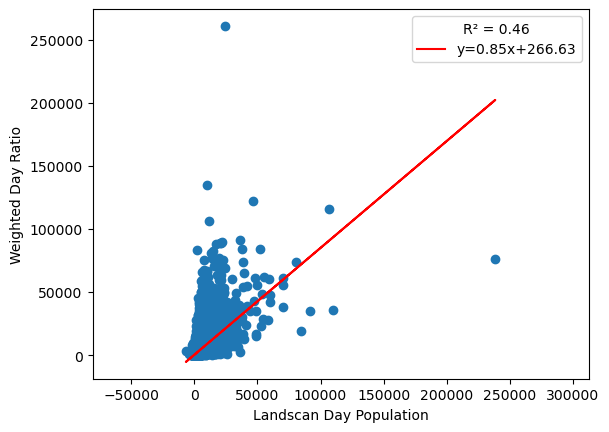

In [228]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Assuming 'day_night_popu_df' is already defined and contains 'landscan_day' and 'weighted_day_ratio'

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(day_night_popu_df.query("landscan_day < 500000")['hourly_noon_popu'], day_night_popu_df.query("landscan_day < 500000")['landscan_day'])

# Create a line of best fit
line = slope * day_night_popu_df.query("landscan_day < 500000")['hourly_noon_popu'] + intercept

# Plot the original scatter plot
plt.scatter(day_night_popu_df['hourly_noon_popu'], day_night_popu_df['landscan_day'])

# Add the line of best fit
plt.plot(day_night_popu_df.query("landscan_day < 500000")['hourly_noon_popu'], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

# Add R^2 value in the legend
plt.legend(title=f'R² = {r_value**2:.2f}')

# Label the axes
plt.xlabel('Landscan Day Population')
plt.ylabel('Weighted Day Ratio')

plt.axis('equal')

# Show the plot
plt.show()


In [229]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
# landscan_df.query(" SUM > 0")

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Assuming 'day_night_popu_df' is already defined and contains 'landscan_day' and 'weighted_day_ratio'

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(day_night_popu_df.query("landscan_day < 500000")['hourly_noon_popu'], day_night_popu_df.query("landscan_day < 500000")['landscan_day'])

# Create a line of best fit
line = slope * day_night_popu_df.query("landscan_day < 500000")['hourly_noon_popu'] + intercept

# Plot the original scatter plot
plt.scatter(day_night_popu_df['hourly_noon_popu'], day_night_popu_df['landscan_day'])

# Add the line of best fit
plt.plot(day_night_popu_df.query("landscan_day < 500000")['hourly_noon_popu'], line, 'r', label=f'y={slope:.2f}x+{intercept:.2f}')

# Add R^2 value in the legend
plt.legend(title=f'R² = {r_value**2:.2f}')

# Label the axes
plt.xlabel('Landscan Day Population')
plt.ylabel('Weighted Day Ratio')

plt.axis('equal')

# Show the plot
plt.show()


In [ ]:
# merged_df['SUM'].describe()
# noon_popu_df.query(" noon_popu > 0").sum()
noon_popu_df.sum()
landscan_df.query(" SUM > 0")['SUM'].sum(), noon_popu_df.sum()

In [ ]:
# day_peak_popu_df = hourly_popu_df.iloc[:, day_hours].max(axis=1).reset_index()
# day_peak_popu_df.columns = ['CBG', 'day_peak_popu']
merged_df = noon_popu_df.reset_index().merge(landscan_df.query(" SUM > 0"), left_on='CBG', right_on='GEOID')
noon_popu_df.sum()

In [ ]:
merged_df['popu_diff'] = merged_df['noon_popu'] - merged_df['SUM']
merged_df['popu_diff_ratio'] = merged_df['popu_diff'] / merged_df['SUM']
merged_df['ratio'] = merged_df['noon_popu'] / merged_df['SUM']

print("ratio mean:", merged_df['ratio'].abs().mean())
merged_df

In [ ]:
print("Negative cell ratio:")
(hourly_popu_df<0).sum().sum() / (hourly_popu_df.shape[0] * hourly_popu_df.shape[1])#.min(axis=1)  # too many negtive values

In [ ]:
merged_df.query("noon_popu < 0")['noon_popu'].sum()
hourly_popu_df

# County difference

In [ ]:
merged_df['SUM'].sum(), merged_df['noon_popu'].sum()

In [ ]:
merged_df['county'] = merged_df['GEOID'].str[:5]
groupped = merged_df.groupby(['county'], as_index=False)[['noon_popu', 'SUM', 'popu_diff']].sum()

groupped['diff_ratio'] = groupped['popu_diff'] / groupped['SUM']
groupped['diff_ratio_abs'] = groupped['diff_ratio'].abs()

total_popu = groupped['SUM'].sum()
groupped['weight'] = groupped['SUM'] / total_popu
groupped['weighted_diff_ratio'] = groupped['diff_ratio_abs'] * groupped['weight']

groupped['ratio'] = (groupped['noon_popu'] / groupped['SUM']).abs()

print("County ratio:", groupped['ratio'].abs().mean())
print("County weighted_diff_ratio:", groupped['weighted_diff_ratio'].abs().mean())

groupped

In [ ]:
# merged_df['weighted_diff_ratio'].abs().sum(), merged_df['diff_ratio_abs'].mean()

In [ ]:
groupped.query("county == '36061' ")

In [ ]:
groupped['diff_ratio'].abs().mean(), groupped['weighted_diff_ratio'].sum()

In [ ]:
merged_df

In [ ]:
merged_df  = merged_df.query(" SUM > 0")
merged_df['diff_ratio'] = merged_df['popu_diff'] / merged_df['SUM']
merged_df['diff_ratio_abs'] = merged_df['diff_ratio'].abs()

total_popu = merged_df['SUM'].sum()
merged_df['weight'] = merged_df['SUM'] / total_popu
merged_df['weighted_diff_ratio'] = merged_df['diff_ratio_abs'] * merged_df['weight']

merged_df['ratio'] = (merged_df['noon_popu'] / merged_df['SUM']) 
merged_df['weighted_ratio'] = merged_df['ratio'] * merged_df['weight']


print("total_popu:", total_popu)
print("CBG ratio (absolute mean):", merged_df['ratio'].abs().mean())
print("CBG absolute weighted_ratio:", merged_df['weighted_ratio'].abs().sum())


merged_df

In [ ]:
merged_df['weighted_diff_ratio'].abs().sum(), merged_df['diff_ratio_abs'].mean()

In [ ]:
merged_df.sort_values('SUM').iloc[-1000:, :]#.sample(10)

In [ ]:
merged_df['weight'].sum(), merged_df['weighted_ratio'].abs().sum(), merged_df['noon_popu'].sum()

In [ ]:
merged_df['diff_ratio'].abs().mean(), merged_df['weighted_diff_ratio'].sum(), merged_df['weighted_ratio'].abs().sum(), merged_df['ratio'].abs().mean()